<a href="https://colab.research.google.com/github/at19990/sports_analytics/blob/master/p02-histogram-rugby.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ラグビーのデータをヒストグラムで可視化  

ラグビー日本代表の過去のテストマッチにおける1試合当たりの得失点差・PG数・トライ数・コンバージョン数をヒストグラムで可視化し、その分布を観察する

In [0]:
import numpy as np
import pandas as pd
import scipy.stats as sp
from scipy.stats import norm

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc


In [2]:
!pip install japanize_matplotlib
import japanize_matplotlib


## データ

ESPNSCRUM (http://stats.espnscrum.com/statsguru/rugby/stats/index.html) からデータを取得する

In [0]:
# 表データをデータフレームに落とし込む
url = 'http://stats.espnscrum.com/statsguru/rugby/stats/index.html?class=1;orderby=date;team=23;template=results;type=team;view=match'
fetched_dataframes = pd.io.html.read_html(url)
df1 = fetched_dataframes[3]

for i in range(2, 9):

  url = 'http://stats.espnscrum.com/statsguru/rugby/stats/index.html?class=1;orderby=date;page={};team=23;template=results;type=team;view=match'.format(i)
  fetched_dataframes = pd.io.html.read_html(url)
  df2 = fetched_dataframes[3]
  df1 = pd.concat([df1, df2])

In [4]:
# インデックスの振り直し
df1 = df1.reset_index(drop=True)
# 不要な列の削除
df1 = df1.drop(df1.columns[[9, 13]], axis=1)

df1

,Team,Result,For,Aga,Diff,Tries,Conv,Pens,Drop,Opposition,Ground,Match Date
0,Japan,draw,3,3,0,1,0,0,0,v British Col,Vancouver,24 Sep 1930
1,Japan,won,9,8,1,3,0,0,0,v Canada,Osaka,31 Jan 1932
2,Japan,won,38,5,33,8,4,2,0,v Canada,Tokyo,11 Feb 1932
3,Japan,lost,8,18,-10,1,1,1,0,v Aust Unis,Tokyo,11 Feb 1934
4,Japan,won,14,9,5,3,1,1,0,v Aust Unis,Osaka,18 Feb 1934
...,...,...,...,...,...,...,...,...,...,...,...,...
352,Japan,won,30,10,20,4,2,2,0,v Russia,Tokyo,20 Sep 2019
353,Japan,won,19,12,7,1,1,4,0,v Ireland,Shizuoka,28 Sep 2019
354,Japan,won,38,19,19,4,3,4,0,v Samoa,Aichi,5 Oct 2019
355,Japan,won,28,21,7,4,4,0,0,v Scotland,Yokohama,13 Oct 2019


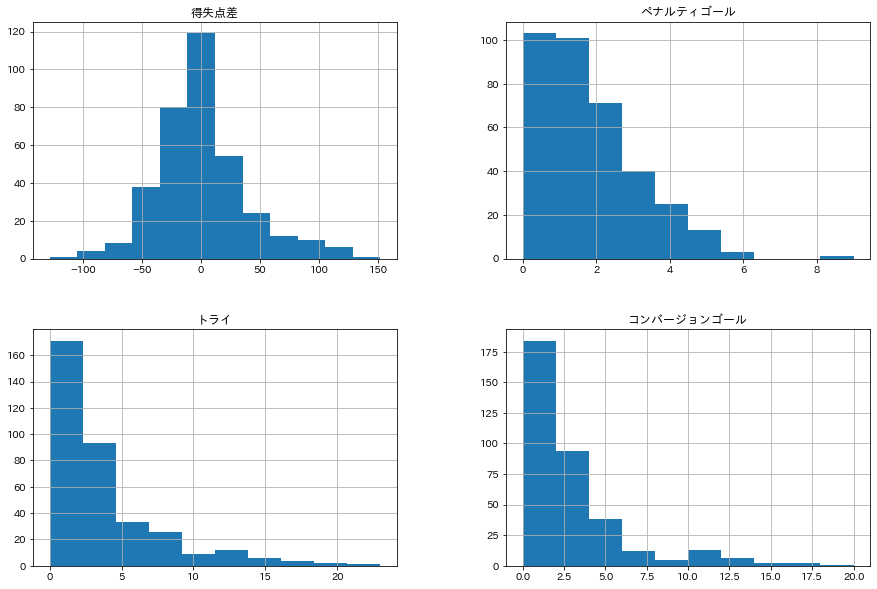

In [15]:
# ヒストグラム描画
plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(2,2,1)
df1.Diff.hist(bins=12)
plt.title("得失点差")

plt.subplot(2,2,2)
df1.Pens.hist()
plt.title("ペナルティゴール")

plt.subplot(2,2,3)
df1.Tries.hist()
plt.title("トライ")

plt.subplot(2,2,4)
df1.Conv.hist()
plt.title("コンバージョンゴール")

plt.show()
